# What is Sympy?

### SymPy is a package for symbolic calculations in python, similar to Mathematica. It works with expressions containing symbols.

In [1]:
from sympy import *
init_printing()

Symbols are basic bricks used to construct expressions. Each symbol has a name used for printing expressions. Objects of the class Symbol should be created and assigned to python variables in order to be used in expressions. The symbol name and the name of the variable to which this symbol is assigned are two independent things, and one may write abc=Symbol('xyz'). But then one has to write abc in input expressions, while SymPy will write xyz in output ones, producing unnecessary confusion. The python variable name should better be the same as the symbol name.

In languages specifically designed for symbolic calculations, such as Mathematica, if a variable to which nothing has been assigned is used, it automatically means a symbol with the same name. Python has not been designed for symbolic calculations. If you use a variable to which nothing has been assigned, you will get an error message. Symbol objects have to be created explicitly.


In [110]:
x=Symbol('x')
a=x**2-1
a

## Elementary functions

### SymPy automatically applies simplifications of elementary functions which are correct everywhere.

In [13]:
sin(-x)

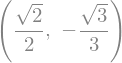

In [14]:
cos(pi/4),tan(5*pi/6)

### SymPy can work with floating point numbers having arbitrarily high precision. Here is π with 100 significant digits.

In [15]:
pi.n(100)

In [10]:
log(1),log(E)

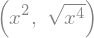

In [19]:
sqrt(x)**4,sqrt(x**4)

### Symbols can have certain properties. E.g., they can be positive. Then SymPy can simplify square roots better.

In [27]:
p,q,y=symbols('p q y',positive=True)
sqrt(p**2)

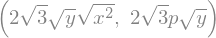

In [28]:
sqrt(12*x**2*y),sqrt(12*p**2*y)

### Let the symbol n be integer (I is the imaginary unit).

In [30]:
n=Symbol('n',integer=True)
exp(2*pi*I*n)

### The method rewrite tries to rewrite an expression in terms of a given function.

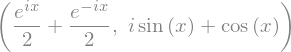

In [32]:
cos(x).rewrite(exp),exp(I*x).rewrite(sin)

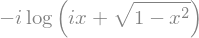

In [34]:
asin(x).rewrite(log)

In [38]:
a1,a2,b1,b2=symbols('a1 a2 b1 b2')
a=a1*cos(x)+a2*cos(2*x)+b1*sin(x)+b2*sin(2*x)
a

### We want to square it and get a truncated Fourier series again.

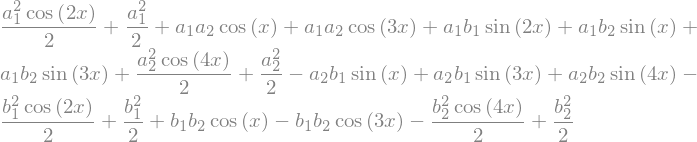

In [39]:
a=(a**2).rewrite(exp).expand().rewrite(cos).expand()
a

In [40]:
a=expand_log(log(p*q**2))

In [41]:
a

## New symbolic functions can be introduced. They may have an arbitrary numbers of arguments.

In [42]:
f=Function('f')
f(x)+f(x,y)

## Solving equations

In [43]:
a,b,c,d,e,f=symbols('a b c d e f')


In [44]:
solve(Eq(a*x,b),x)

### Instead of equations, one may pass just expressions to solve; they mean equations <expression>=0.

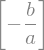

In [45]:
solve(a*x+b,x)

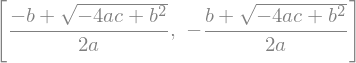

In [46]:
## A square equation has 2 solutions:
solve(a*x**2+b*x+c,x)


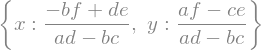

In [47]:
## A system of linear equations.
solve([a*x+b*y-e,c*x+d*y-f],[x,y])


In [118]:
## The function roots returns roots of a polynomial together with their multiplicities.
roots((x**3-3*x+2),x)

## Series

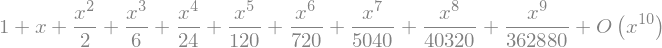

In [111]:
exp(x).series(x,0,10)


### If we don't specify around which point default is around 0

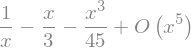

In [54]:
cot(x).series(x,n=5)

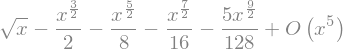

In [55]:
## A series can have negative powers or non-integer powers.
sqrt(x*(1-x)).series(x,n=5)


### Operations on series

In [57]:
sinx=series(sin(x),x,0,8)
cosx=series(cos(x),x,n=8)
tanx=series(tan(x),x,n=8)

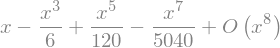

In [62]:
series(tanx*cosx,n=8)

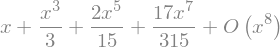

In [63]:
series(sinx/cosx,n=8)

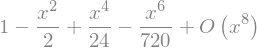

In [64]:
cosx

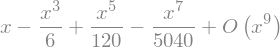

In [65]:
integrate(cosx,x)

# Derivatives

In [66]:
a=x*sin(x+y)
a

In [67]:
diff(a,x)

In [68]:
diff(a,y)

### Higer order derivatives

In [69]:
diff(a,x,2)

In [70]:
diff(a,x,2,y,1)

# Integrals

### Indefinite integrals

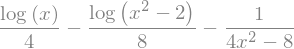

In [71]:
integrate(1/(x*(x**2-2)**2),x)

In [72]:
integrate(1/(exp(x)+1),x)

### Definite integrals

In [73]:
integrate(sin(x),(x,0,pi))

In [74]:
integrate(exp(-x**2),(x,0,oo))

# Sums and sequences

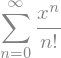

In [75]:
a=Sum(x**n/factorial(n),(n,0,oo))
a

In [76]:
a.doit()

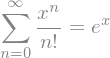

In [77]:
Eq(a,a.doit())

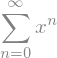

In [78]:
a=Sum(x**n,(n,0,oo))
a

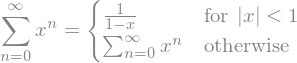

In [79]:
Eq(a,a.doit())

# Limits

In [81]:
limit((tan(sin(x))-sin(tan(x)))/x**7,x,0)

# ODE's and systems of ODE's

In [83]:
t=Symbol('t')
x=Function('x')
p=Function('p')

### 1)  $\displaystyle\frac{d x(t)}{\partial t}+x(t)=0$

In [85]:
dsolve(diff(x(t),t)+x(t),x(t))

### 2)  $\displaystyle\frac{d^2 x(t)}{\partial t^2}+x(t)=0$

In [86]:
dsolve(diff(x(t),t,2)+x(t),x(t))

### 3) $\begin{cases} \displaystyle\frac{d x(t)}{\partial t}-p(t)=0\\ \displaystyle\frac{d p(t)}{\partial t}+x(t)=0 \end{cases}$

In [91]:
dsolve((diff(x(t),t)-p(t),diff(p(t),t)+x(t)),[x(t),p(t)])

# Linear Algebra

In [99]:
a,b,c,d,e,f,g,h,i=symbols('a b c d e f g h i',real=True)

### A matrix can be constructed from a list of lists.


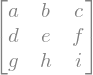

In [100]:

M=Matrix([[a,b,c],[d,e,f],[g,h,i]])
M

### We can compute the determinant

In [101]:
M.det()

### And the inverse

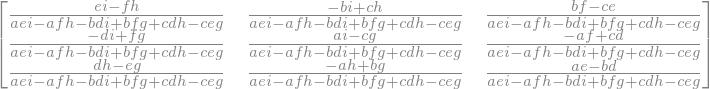

In [95]:
M.inv()

In [96]:
print(M.inv())

Matrix([[(e*i - f*h)/(a*e*i - a*f*h - b*d*i + b*f*g + c*d*h - c*e*g), (-b*i + c*h)/(a*e*i - a*f*h - b*d*i + b*f*g + c*d*h - c*e*g), (b*f - c*e)/(a*e*i - a*f*h - b*d*i + b*f*g + c*d*h - c*e*g)], [(-d*i + f*g)/(a*e*i - a*f*h - b*d*i + b*f*g + c*d*h - c*e*g), (a*i - c*g)/(a*e*i - a*f*h - b*d*i + b*f*g + c*d*h - c*e*g), (-a*f + c*d)/(a*e*i - a*f*h - b*d*i + b*f*g + c*d*h - c*e*g)], [(d*h - e*g)/(a*e*i - a*f*h - b*d*i + b*f*g + c*d*h - c*e*g), (-a*h + b*g)/(a*e*i - a*f*h - b*d*i + b*f*g + c*d*h - c*e*g), (a*e - b*d)/(a*e*i - a*f*h - b*d*i + b*f*g + c*d*h - c*e*g)]])


### Which becomes very easy to copy paste into code

### We can also do cholesky decomposition

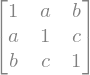

In [102]:
M=Matrix([[1,a,b],[a,1,c],[b,c,1]])
M

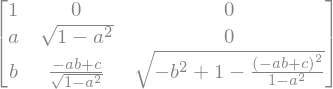

In [103]:
M.cholesky(hermitian=False)

### Singular values

In [104]:
print(M.singular_values())

[sqrt(2*a**2/3 + 2*b**2/3 + 2*c**2/3 - (-3*a**4 - 6*a**2*b**2 - 6*a**2*c**2 + 36*a*b*c - 3*b**4 - 6*b**2*c**2 - 3*c**4 + (-2*a**2 - 2*b**2 - 2*c**2 - 3)**2 - 9)/(3*(-1/2 + sqrt(3)*I/2)*(-27*a**4/2 + 54*a**3*b*c - 54*a**2*b**2*c**2 - 27*a**2*b**2 - 27*a**2*c**2 + 27*a**2 + 54*a*b**3*c + 54*a*b*c**3 - 54*a*b*c - 27*b**4/2 - 27*b**2*c**2 + 27*b**2 - 27*c**4/2 + 27*c**2 + sqrt(-4*(-3*a**4 - 6*a**2*b**2 - 6*a**2*c**2 + 36*a*b*c - 3*b**4 - 6*b**2*c**2 - 3*c**4 + (-2*a**2 - 2*b**2 - 2*c**2 - 3)**2 - 9)**3 + (-27*a**4 + 108*a**3*b*c - 108*a**2*b**2*c**2 - 54*a**2*b**2 - 54*a**2*c**2 + 54*a**2 + 108*a*b**3*c + 108*a*b*c**3 - 108*a*b*c - 27*b**4 - 54*b**2*c**2 + 54*b**2 - 27*c**4 + 54*c**2 - (-18*a**2 - 18*b**2 - 18*c**2 - 27)*(a**4 + 2*a**2*b**2 + 2*a**2*c**2 - 12*a*b*c + b**4 + 2*b**2*c**2 + c**4 + 3) + 2*(-2*a**2 - 2*b**2 - 2*c**2 - 3)**3 - 27)**2)/2 - (-18*a**2 - 18*b**2 - 18*c**2 - 27)*(a**4 + 2*a**2*b**2 + 2*a**2*c**2 - 12*a*b*c + b**4 + 2*b**2*c**2 + c**4 + 3)/2 + (-2*a**2 - 2*b**2 - 2*c*

### Not fun at all to do this one by hand!

### LU decomposition

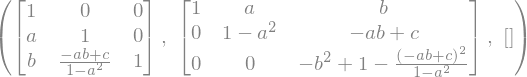

In [105]:
M.LUdecomposition()

# We can compute eigenvalues

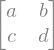

In [106]:
M=Matrix([[a,b],[c,d]])
M

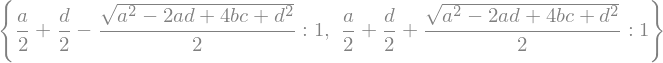

In [107]:
M.eigenvals()


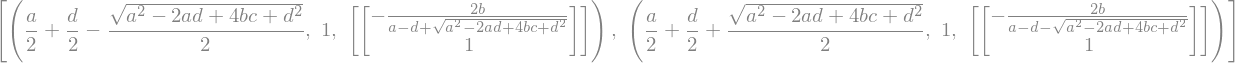

In [108]:
M.eigenvects()

### And much more out there!! I do recommend that you use sympy to check your computations when working out new formulas